In [1]:
import torch
import matplotlib.pyplot as plt
import torchvision
import numpy as np
import sys
sys.path.insert(0, 'Pytorch-UNet')
sys.path.insert(0, 'utils')
from plotting_utils import plot_pytorch_images, make_grid
from misc import merge
from unet.unet_model import UNet
from torch.nn import functional as F
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import torchvision
torch.manual_seed(0);

In [2]:
model_64_256 = torch.load('unet_mask_64_256')
model_64_256.to(1);

model_32_64 = torch.load('unet_mask_32_64')
model_32_64.to(0);


# vae = torch.load('VAE_10K_32_HQ')
# vae.to(0);

In [3]:
dataroot="/hdd/celebaHQ512/"#"/hdd/imagenet//"
num_datapoints = 10000
validation_size = 1000
num_samples = num_datapoints + validation_size

full_dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(256),
                               transforms.CenterCrop(256),
                               transforms.ToTensor()
                           ]))
print(full_dataset)
# torch_data_loader = torch.utils.data.DataLoader(full_dataset, batch_size=32, shuffle=True, num_workers=4, drop_last=True)


torch_dataset,torch_val_dataset,_ = torch.utils.data.random_split(full_dataset, [num_datapoints,validation_size,full_dataset.__len__()-num_samples])
torch_data_loader = torch.utils.data.DataLoader(torch_dataset, batch_size=32, shuffle=True, num_workers=4, drop_last=True)
torch_val_data_loader = torch.utils.data.DataLoader(torch_val_dataset, batch_size=32, drop_last=True, shuffle=False)

Dataset ImageFolder
    Number of datapoints: 30000
    Root location: /hdd/celebaHQ512/
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(256, 256))
               ToTensor()
           )


/root/anaconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


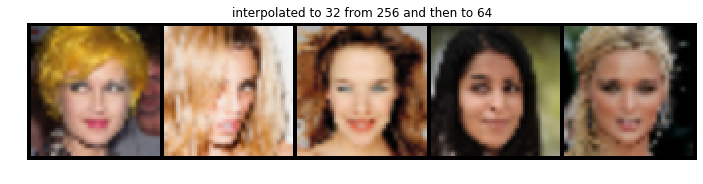

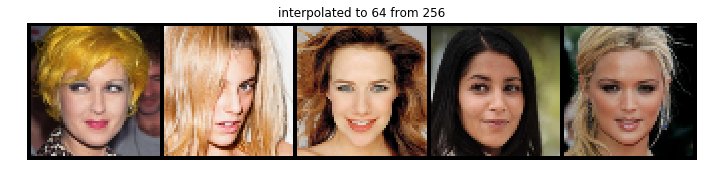

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


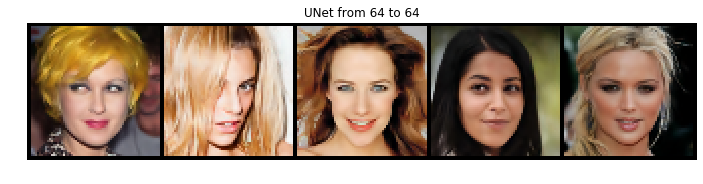

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


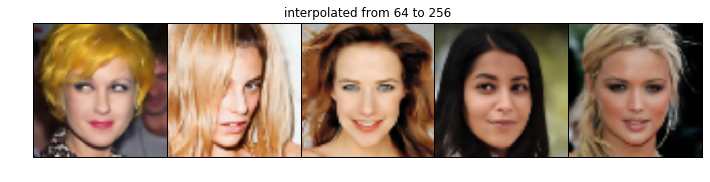

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


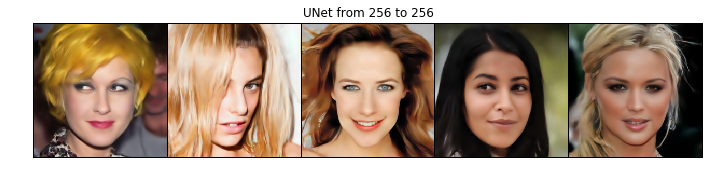

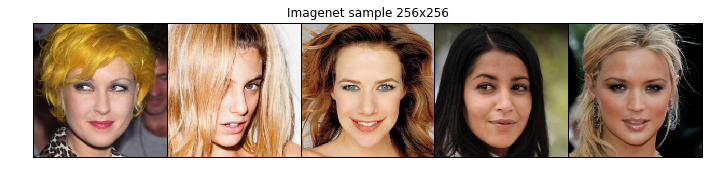

In [4]:
data_loader = torch_data_loader
random_idx = np.random.randint(len(data_loader.dataset)) - 5
x = torch.stack([data_loader.dataset[idx][0] for idx in range(random_idx,random_idx+5)])
y = F.interpolate(F.interpolate(x, 32, mode="bilinear"), 64, mode="bilinear")
make_grid(y[0:5],title="interpolated to 32 from 256 and then to 64");
make_grid(F.interpolate(x, 64, mode="bilinear")[0:5], title="interpolated to 64 from 256")
y = y.to(0)
x_mask_hat = model_32_64(y)
x_hat = y + x_mask_hat
make_grid(x_hat[0:5], title="UNet from 64 to 64");
y = F.interpolate(x_hat, 256, mode="bilinear")
make_grid(y[0:5], title="interpolated from 64 to 256");
y = y.to(1)
x_mask_hat = model_64_256(y)
x_hat_final = y + x_mask_hat
make_grid(x_hat_final[0:5], title="UNet from 256 to 256");
make_grid(x[0:5], title="Imagenet sample 256x256");

torch.Size([5, 3, 256, 256])


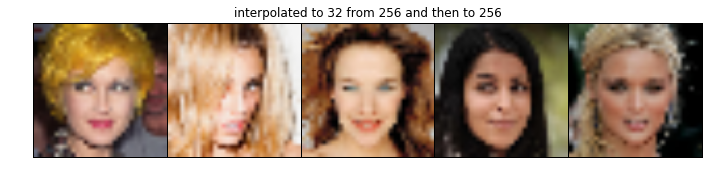

In [10]:
y = F.interpolate(F.interpolate(x, 32, mode="bilinear"), 256, mode="bilinear")
print(y.shape)
make_grid(y[0:5],title="interpolated to 32 from 256 and then to 256");